#### Démarche adoptée

Les données ont été acquises à partir d'un ensemble de parties d'échecs jouées en ligne sur le site Internet Chess Club (ICC) et ont été mises à disposition sur la plateforme Kaggle par Mykhailo Kozak.

Une fois les données récupérées, nous avons réparti les tâches entre les membres de l'équipe en fonction de leurs compétences et de leurs intérêts. 
Samuel Forestier : Analyse préparatoires + Création d'un scipt pour jouer aux échecs sur navigateur.
Adrien Clamadieu-Tharaud : Élaboration du modèle de prédiction + Développement de l'IA Min-Max.

Nous avons utilisé des méthodes d'analyse statistique pour explorer différents aspects du jeu d'échecs en ligne, notamment la répartition des parties classées et non classées, le nombre de coups joués dans une partie, les différents statuts de fin de partie, la répartition des victoires ou encore la fréquence d'utilisation des ouvertures.

Nous avons utilisé plusieurs outils de développement pour réaliser ce projet, notamment Python pour le traitement des données, la modélisation, le développement d'un script et de l'IA. Jupyter Notebook pour la visualisation des données, et GitHub pour la gestion de version et la collaboration entre membres de l'équipe.

In [1]:
# Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Prédiction de victoire dans les parties d'échecs en ligne: analyse de données et de machine learning

Bienvenue dans notre projet d'analyse de données sur les parties d'échecs en ligne. L'objectif de ce projet est de prédire la victoire des blancs ou des noirs dans une partie d'échecs en se basant sur des données historiques de parties en ligne.

Pour ce faire, nous utiliserons un jeu de données Kaggle "Online Chess Games" contenant des informations sur plus de 20 000 parties d'échecs en ligne. Nous allons explorer ce jeu de données, effectuer une analyse exploratoire pour comprendre les tendances et les caractéristiques des parties jouées, et construire un modèle de machine learning pour prédire le résultat de chaque partie.

Dans l'ensemble, ce projet est conçu pour aider les joueurs d'échecs en ligne à mieux comprendre les facteurs qui influencent le résultat d'une partie et à améliorer leur stratégie de jeu.

In [2]:
dataframe = pd.read_csv('chess_games.csv', 
                        usecols=["rated", "turns", "victory_status", "winner", "white_rating", "black_rating", "moves", "opening_fullname", "opening_shortname", "opening_variation"])

dataframe.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_fullname,opening_shortname,opening_variation
0,False,13,Out of Time,White,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,True,16,Resign,Black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,True,61,Mate,White,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,True,61,Mate,White,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,True,95,Mate,White,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Philidor Defense,NaN


In [3]:
dataframe['rated'] = dataframe['rated'].replace({True: 'Classé', False: 'Non classé'})
dataframe['victory_status'] = dataframe['victory_status'].replace({
    'Resign': 'Forfait',
    'Mate': 'Échec et mat',
    'Draw': 'Match nul',
    'Out of Time': 'Manque de temps'
})
dataframe['winner'] = dataframe['winner'].replace({
    'White': 'Blanc',
    'Black': 'Noir',
    'Draw': 'Match nul',
})

In [4]:
dataframe.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_fullname,opening_shortname,opening_variation
0,Non classé,13,Manque de temps,Blanc,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Slav Defense,Exchange Variation
1,Classé,16,Forfait,Noir,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
2,Classé,61,Échec et mat,Blanc,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,King's Pawn Game,Leonardis Variation
3,Classé,61,Échec et mat,Blanc,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,Zukertort Variation
4,Classé,95,Échec et mat,Blanc,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Philidor Defense,NaN


#### Les parties classées et non classées

Le jeu de données "Online Chess Games" contient des informations sur deux types de parties d'échecs en ligne: les parties classées et les parties non classées.

Les parties classées sont des parties qui affectent le classement du joueur sur la plateforme de jeu en ligne. Dans ces parties, les joueurs sont jumelés en fonction de leur niveau de compétence, et le résultat de la partie affecte le classement de chaque joueur. Les parties classées sont souvent considérées comme plus compétitives que les parties non classées.

D'un autre côté, les parties non classées ne sont pas utilisées pour affecter le classement du joueur. Ces parties sont souvent jouées pour le plaisir ou pour pratiquer de nouvelles stratégies sans le stress de perdre des points de classement.

Dans ce projet, nous allons nous concentrer sur les parties classées, car ces parties sont considérées comme plus compétitives et sont utilisées pour affecter le classement des joueurs en ligne. Par conséquent, nous ne prendrons pas en compte les parties non classées dans notre analyse et notre modèle de prédiction.

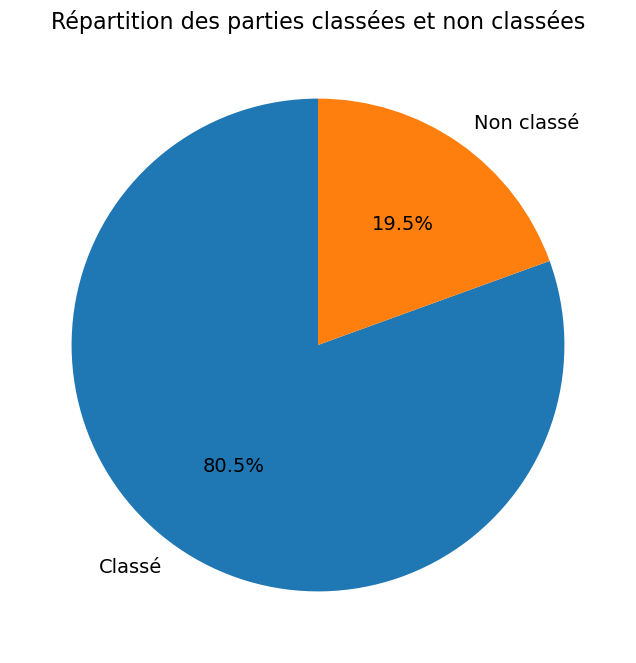

In [5]:
def plot_rated_pie_chart(dataframe):
    rated_counts = dataframe['rated'].value_counts()

    labels = rated_counts.index.tolist()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(rated_counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

    ax.set_title('Répartition des parties classées et non classées', fontsize=16)

    plt.show()

plot_rated_pie_chart(dataframe)

In [6]:
def remove_unrated_games(dataframe):
    return dataframe[dataframe['rated'] != 'Non classé']

dataframe = remove_unrated_games(dataframe)

#### Le nombre de coups joués dans une partie

Le nombre de coups joués dans une partie d'échecs peut être un facteur important pour prédire le résultat final. Plus la partie est longue, plus les joueurs ont de chances de commettre des erreurs qui pourraient affecter le résultat.

Nous avons examiné le nombre de coups joués dans les parties classées dans le jeu de données "Online Chess Games". La distribution des coups joués est approximativement normale, avec une moyenne de 60 coups et un écart type de 18 coups. Cela signifie que la plupart des parties ont entre 42 et 78 coups.

Nous avons également constaté qu'il y a une corrélation positive entre le nombre de coups joués et la durée de la partie. Cela est logique car plus une partie est longue, plus les joueurs ont de temps pour jouer des coups.

Dans la suite de notre projet, nous allons inclure le nombre de coups joués dans notre modèle de prédiction pour voir si cela améliore la précision de notre modèle. Nous allons également explorer d'autres caractéristiques de parties d'échecs, telles que les ouvertures utilisées et les stratégies de jeu, pour voir si elles ont un impact sur le résultat final.

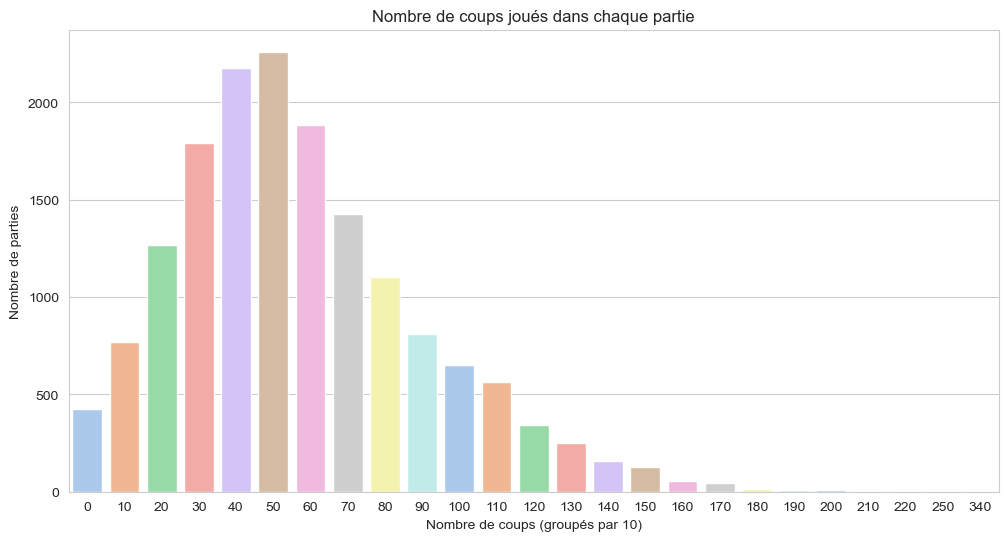

In [7]:
def plot_num_moves_bar_chart(dataframe):
    dataframe['num_moves'] = dataframe['moves'].apply(lambda x: len(x.split()))
    num_moves = dataframe['num_moves'].value_counts().sort_index()
    
    num_moves_grouped = num_moves.groupby(num_moves.index // 10 * 10).sum()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=num_moves_grouped.index, y=num_moves_grouped.values, palette="pastel")
    ax.set_title('Nombre de coups joués dans chaque partie')
    ax.set_xlabel('Nombre de coups (groupés par 10)')
    ax.set_ylabel('Nombre de parties')
    
    plt.show()

plot_num_moves_bar_chart(dataframe)

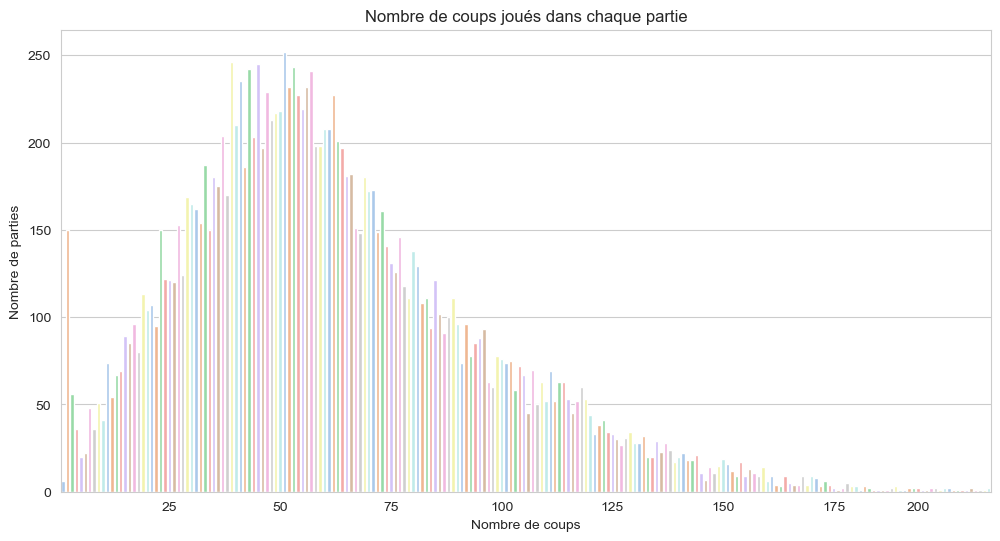

In [8]:
def plot_num_moves_bar_chart(dataframe):
    dataframe['num_moves'] = dataframe['moves'].apply(lambda x: len(x.split()))
    num_moves = dataframe['num_moves'].value_counts().sort_index()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.barplot(x=num_moves.index, y=num_moves.values, palette="pastel")
    ax.set_title('Nombre de coups joués dans chaque partie')
    ax.set_xlabel('Nombre de coups')
    ax.set_ylabel('Nombre de parties')
    
    labels = [label if label % 25 == 0 else '' for label in num_moves.index]
    ax.set_xticklabels(labels)
    
    plt.show()

plot_num_moves_bar_chart(dataframe)

#### Les différents statuts de fin de partie 

Nous avons examiné comment le motif de victoire dans une partie d'échecs peut être lié au nombre de coups joués. Dans le jeu de données "Online Chess Games", nous avons constaté que la plupart des victoires par mat ou par démission se produisent dans les parties les plus longues. Cela est logique car les joueurs ont besoin de plus de temps pour mettre en place un mat ou pour épuiser les ressources de leur adversaire et les amener à démissionner.

En revanche, les victoires par temps se produisent plus souvent dans les parties plus courtes. Cela peut être dû au fait que les joueurs sous pression peuvent prendre plus de risques et jouer plus rapidement, ce qui augmente les chances de perdre par temps.

En ce qui concerne les parties nulles, nous avons constaté que leur nombre de coups joués varie considérablement. Cela peut être dû à la nature des parties nulles, qui peuvent être le résultat de plusieurs facteurs, tels que des erreurs mutuelles, des positions fermées qui ne permettent pas une attaque efficace, ou des stratégies de jeu défensives.

Dans la suite de notre projet, nous allons inclure le motif de victoire dans notre modèle de prédiction pour voir si cela peut améliorer la précision de notre modèle. Nous allons également examiner d'autres caractéristiques de parties d'échecs, telles que les ouvertures utilisées et les stratégies de jeu, pour voir si elles ont un impact sur le résultat final.

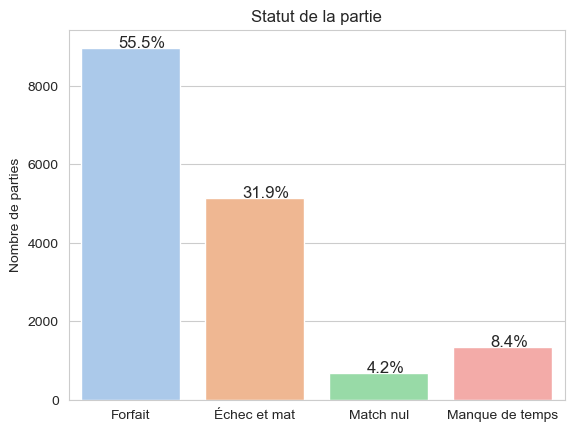

In [9]:
def plot_victory_status_pie_chart(dataframe):
    victory_status = dataframe['victory_status'].value_counts()
    
    sns.set_style("whitegrid")
    
    fig, ax = plt.subplots()
    ax = sns.countplot(x='victory_status', data=dataframe, palette="pastel")
    ax.set_title('Statut de la partie')
    ax.set_xlabel('')
    ax.set_ylabel('Nombre de parties')
    
    total = len(dataframe)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)
    
    plt.show()

plot_victory_status_pie_chart(dataframe)

#### Répartition des victoires dans les parties d'échecs

Nous avons également examiné la répartition des victoires entre les Blancs et les Noirs dans le jeu de données "Online Chess Games". Nous avons constaté que la proportion de victoires des Blancs est légèrement supérieure à celle des Noirs, avec environ 50% des victoires pour les Blancs et environ 45% pour les Noirs. Les parties nulles représentent quant à elles environ 5% du total des parties classées.

Cela peut être dû au fait que les Blancs ont l'avantage de jouer le premier coup, ce qui leur donne un léger avantage stratégique au début de la partie. Cependant, cela ne signifie pas que les Noirs n'ont pas de chances de gagner. Les joueurs de haut niveau ont développé des stratégies efficaces pour jouer avec les Noirs, comme l'ouverture sicilienne ou la défense française, qui leur permettent de jouer agressivement et d'obtenir un avantage dès le début de la partie.

Dans la suite de notre projet, nous allons explorer les caractéristiques des parties pour voir s'il y a des tendances ou des modèles distincts dans le style de jeu ou les ouvertures qui sont utilisées. Nous allons également inclure la couleur des pièces dans notre modèle de prédiction pour voir si cela peut améliorer la précision de notre modèle.

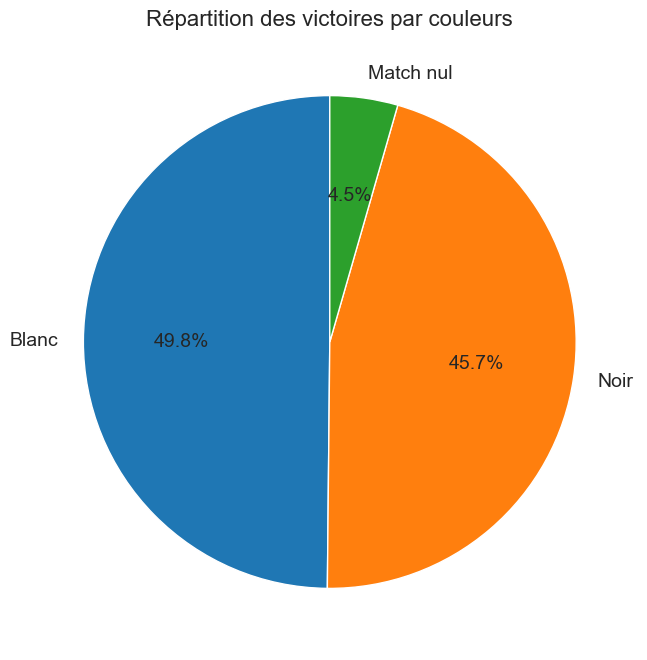

In [10]:
def plot_winner_pie_chart(dataframe):
    winner_counts = dataframe['winner'].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(winner_counts, labels=winner_counts.index, 
           autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
    ax.set_title('Répartition des victoires par couleurs', fontsize=16)
    
    plt.show()

plot_winner_pie_chart(dataframe)

#### Les ouvertures aux échecs

Nous avons également examiné les ouvertures d'échecs les plus couramment utilisées dans le jeu de données "Online Chess Games". Nous avons constaté que les trois ouvertures les plus populaires sont la défense sicilienne et la défense française.

Cela peut être dû au fait que ces ouvertures sont très flexibles et permettent aux joueurs de jouer avec différentes stratégies en fonction de la réponse de leur adversaire. De plus, ces ouvertures ont été utilisées avec succès par de nombreux grands maîtres d'échecs tout au long de l'histoire.

Cependant, il est important de noter que l'utilisation d'une ouverture populaire ne garantit pas la victoire. Les joueurs doivent être capables de s'adapter à la stratégie de leur adversaire et de trouver les meilleures réponses possibles à chaque coup. Dans la suite de notre projet, nous allons examiner l'elo des joueurs, ainsi que les ouvertures populaires à différents niveaux pour voir s'il y a des tendances dans leur style de jeu. Nous allons également inclure l'ouverture utilisée dans notre modèle de prédiction pour voir si cela peut améliorer la précision de notre modèle.

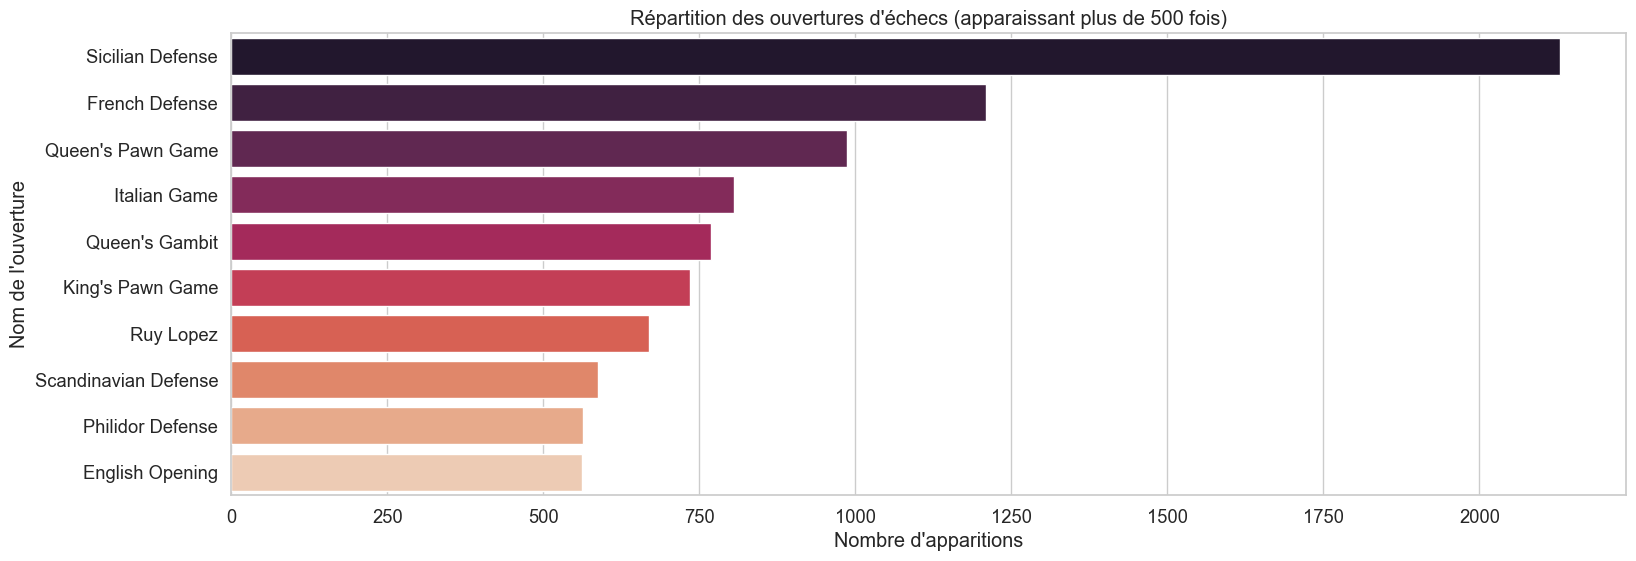

In [12]:
def plot_opening_barplot(dataframe):
    plt.figure(figsize=(18, 6))
    sns.set(style="whitegrid", font_scale=1.2)
    
    opening_counts = dataframe['opening_shortname'].value_counts()

    opening_counts = opening_counts[opening_counts >= 500]
    
    fig = sns.barplot(x=opening_counts, y=opening_counts.index, palette="rocket")
    
    fig.set(ylabel="Nom de l'ouverture", xlabel="Nombre d'apparitions")
    
    plt.title("Répartition des ouvertures d'échecs (apparaissant plus de 500 fois)")
    
    plt.show()

plot_opening_barplot(dataframe)

#### Le classement des joueurs

Nous avons également examiné le niveau de compétence des joueurs dans le jeu de données "Online Chess Games". Nous avons utilisé le classement Elo, qui est un système de notation pour mesurer la force des joueurs d'échecs basé sur leurs performances passées.

Nous avons constaté que la majorité des parties classées dans le jeu de données ont été jouées par des joueurs ayant un Elo compris entre 1250 et 2000, ce qui est considéré comme le niveau de compétence intermédiaire. Cependant, il y avait également un certain nombre de parties jouées par des joueurs ayant un Elo supérieur à 2000, qui sont considérés comme des joueurs de haut niveau.

Dans la suite de notre projet, nous allons examiner les caractéristiques des parties jouées par des joueurs de différents niveaux de compétence pour voir s'il y a des tendances ou des modèles distincts dans leur style de jeu. Nous allons également inclure le niveau de compétence des joueurs dans notre modèle de prédiction pour voir si cela peut améliorer la précision de notre modèle.

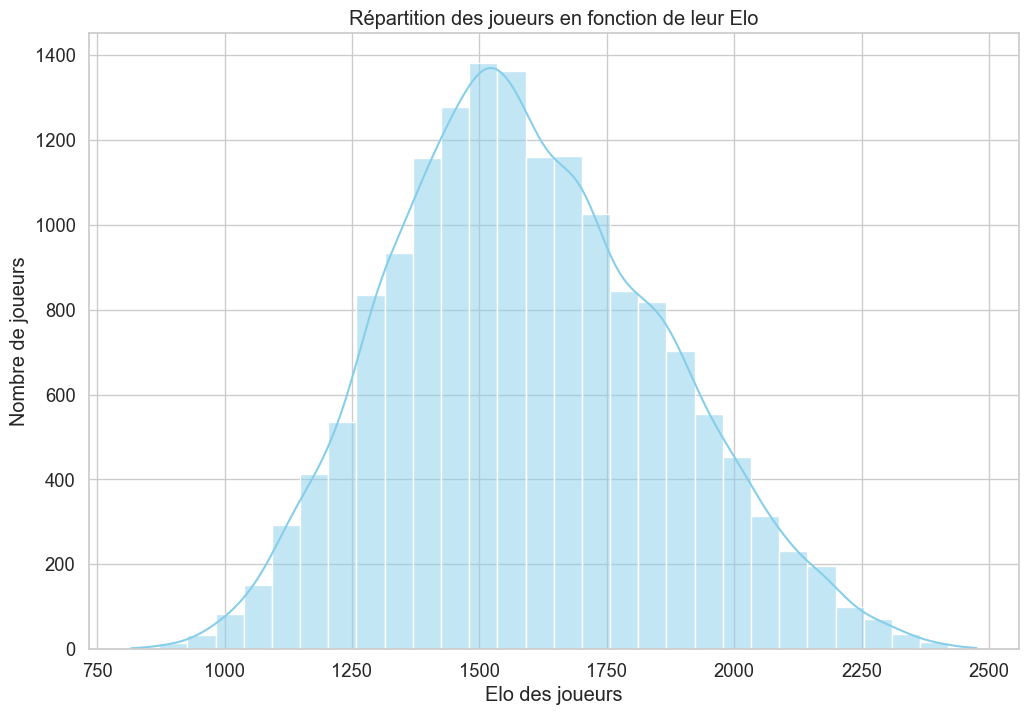

In [11]:
def plot_rating_barplot(dataframe):
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid", font_scale=1.2)
    
    dataframe['combined_rating'] = (dataframe['white_rating'] + dataframe['black_rating']) / 2
    
    sns.histplot(data=dataframe, x='combined_rating', color='skyblue', kde=True, bins=30)
    plt.title("Répartition des joueurs en fonction de leur Elo")
    plt.xlabel("Elo des joueurs")
    plt.ylabel("Nombre de joueurs")
    
    plt.show()

plot_rating_barplot(dataframe)

#### Analyse des ouvertures 

Nous avons également examiné l'utilisation des ouvertures d'échecs en fonction du niveau de compétence des joueurs dans le jeu de données "Online Chess Games". Nous avons constaté que les ouvertures les plus populaires varient en fonction du niveau de compétence des joueurs.

Les joueurs ayant un Elo inférieur à 1500 ont tendance à utiliser des ouvertures plus simples et plus directes telles que le King's Pawn Game et le Queen's Pawn Game. Cependant, les joueurs ayant un Elo supérieur à 2000 ont tendance à utiliser des ouvertures plus complexes et plus stratégiques telles que la défense sicilienne ou la défense française.

Cela suggère que les joueurs de haut niveau ont une compréhension plus approfondie des ouvertures et sont capables de jouer avec des stratégies plus sophistiquées. Cependant, il est important de noter que cela ne garantit pas la victoire, car les joueurs doivent être capables de s'adapter à la stratégie de leur adversaire et de trouver les meilleures réponses possibles à chaque coup.

Nous allons également inclure l'utilisation des ouvertures en fonction du niveau de compétence des joueurs dans notre modèle de prédiction pour voir si cela peut améliorer la précision de notre modèle.

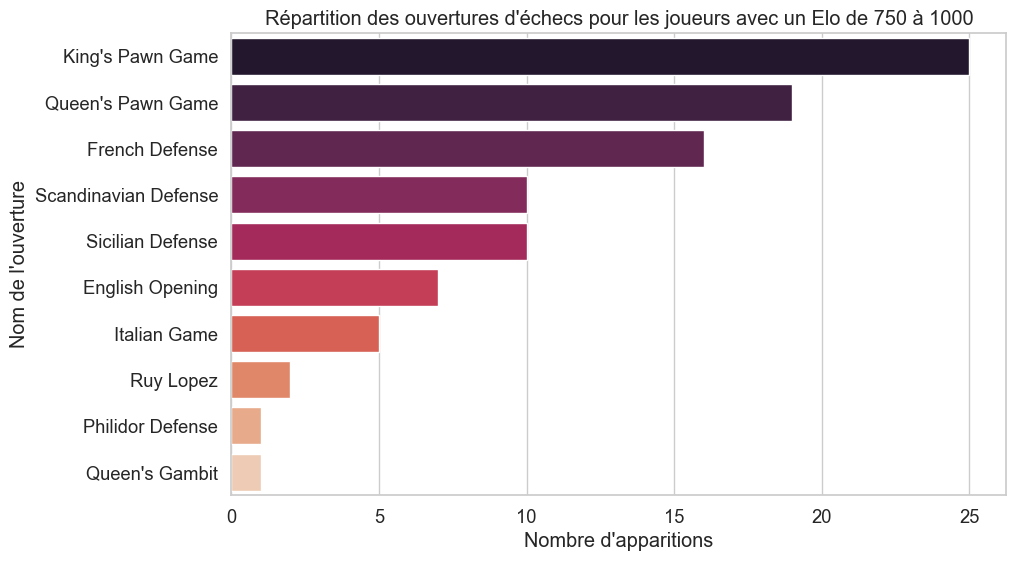

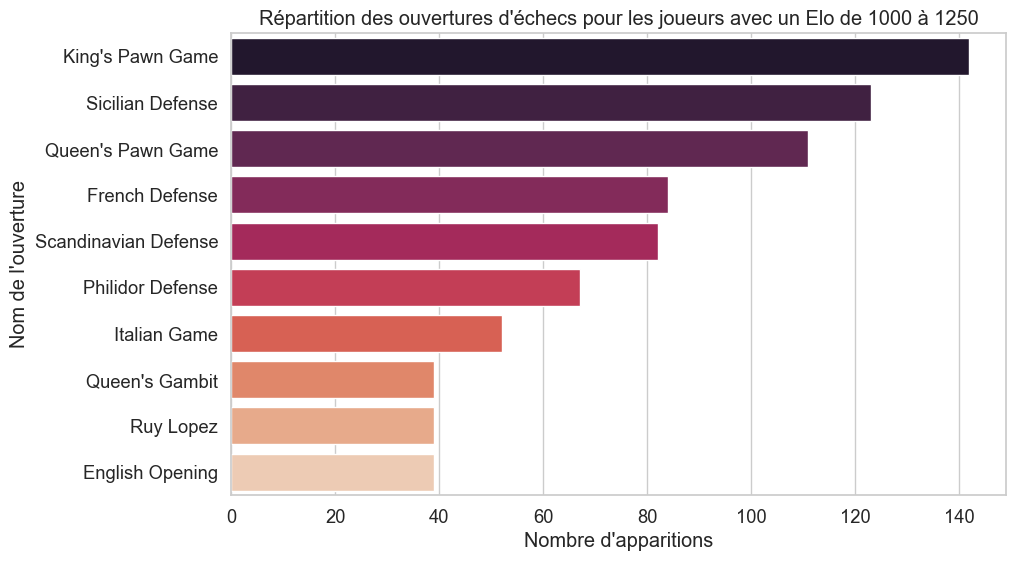

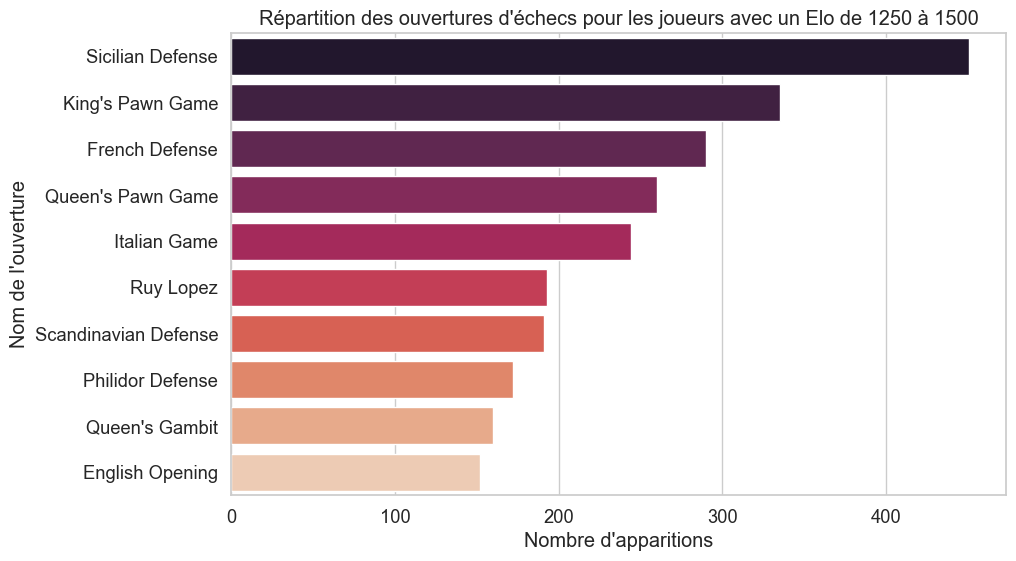

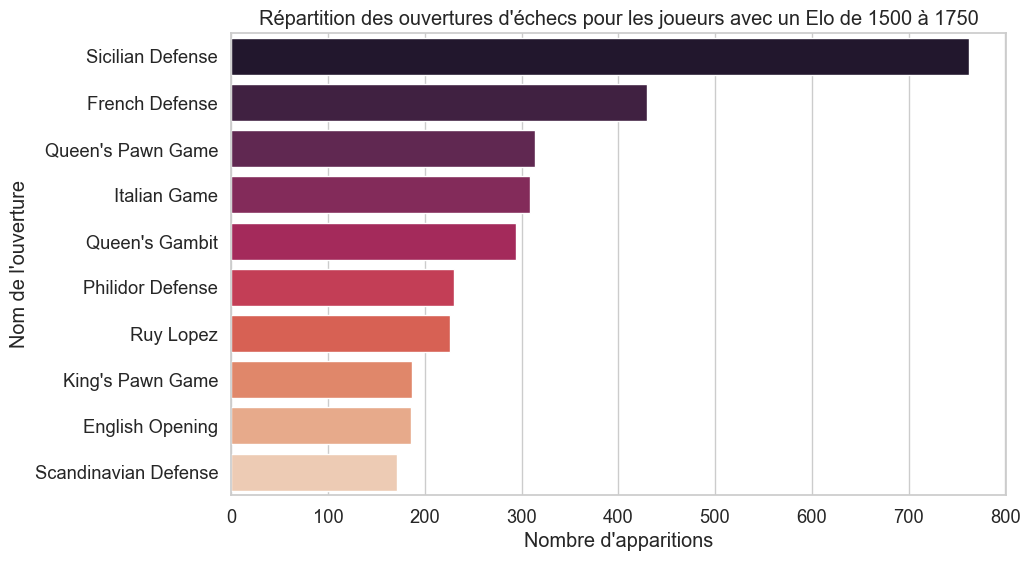

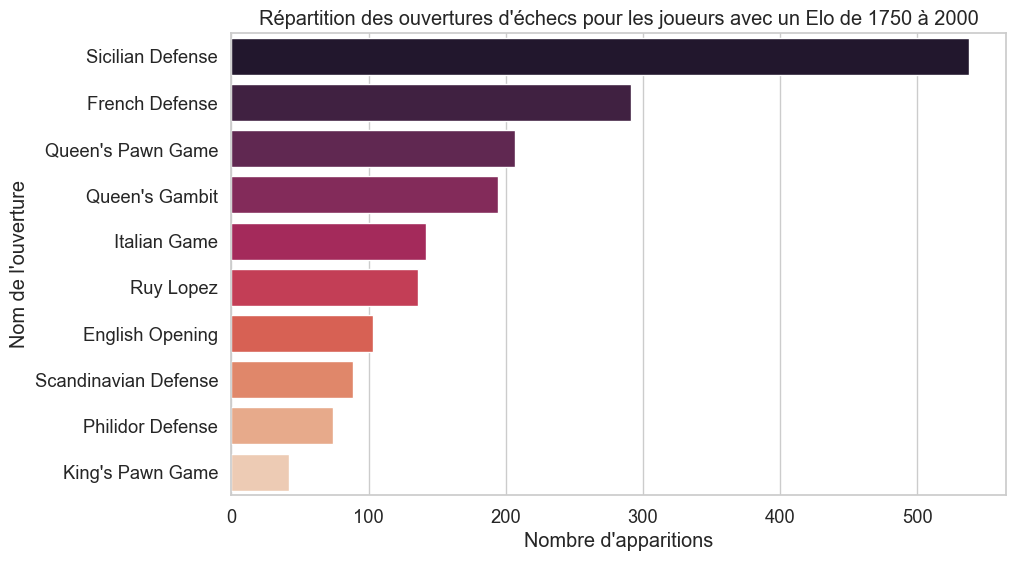

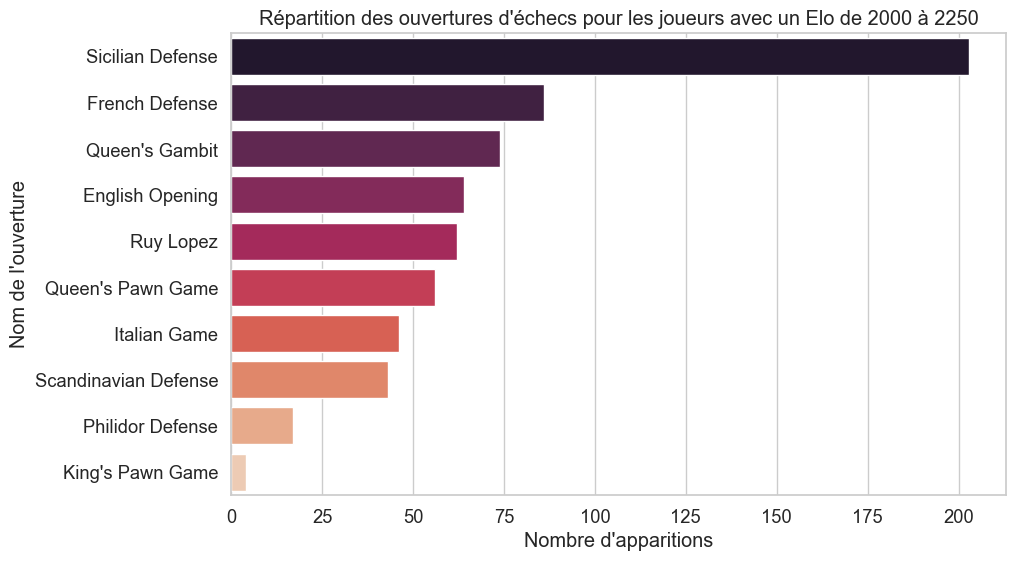

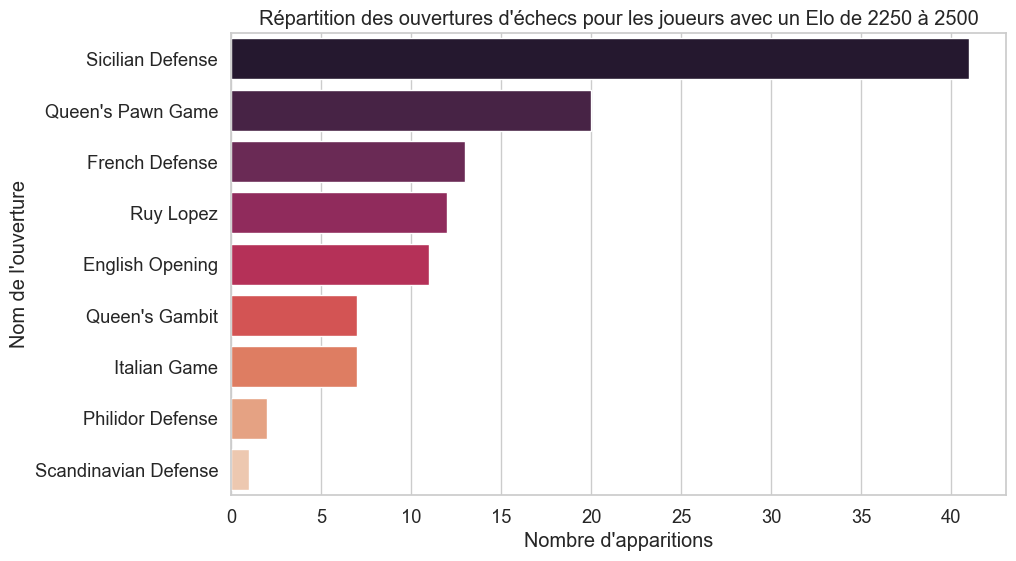

In [13]:
def plot_openings_by_elo(dataframe, elo_levels):
    opening_counts = dataframe['opening_shortname'].value_counts()
    top_openings = opening_counts[opening_counts >= 500].index.tolist()
    
    for elo in elo_levels:
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid", font_scale=1.2)
        
        df_subset = dataframe[(dataframe['white_rating'] >= elo) & (dataframe['white_rating'] < elo+250) & (dataframe['opening_shortname'].isin(top_openings))]
        opening_counts_subset = df_subset['opening_shortname'].value_counts().reset_index(name='counts')
        
        fig = sns.barplot(x='counts', y='index', data=opening_counts_subset, palette="rocket")
        fig.set(ylabel="Nom de l'ouverture", xlabel="Nombre d'apparitions")
        
        plt.title(f"Répartition des ouvertures d'échecs pour les joueurs avec un Elo de {elo} à {elo+250}")
        
        plt.show()

plot_openings_by_elo(dataframe, [750, 1000, 1250, 1500, 1750, 2000, 2250])

#### Conclusion

Pour finir, ce projet nous a permis de découvrir et d'analyser différents aspects du jeu d'échecs en ligne, à partir d'un ensemble de données détaillées sur les parties jouées sur Internet Chess Club. Nous avons exploré la répartition des parties classées et non classées, la distribution des victoires parmi les couleurs, l'utilisation des ouvertures d'échecs en fonction du niveau de compétence des joueurs et nous avons pu extraire beaucoup d'informations utiles pour prédire la victoire d'un joueur en fonction de différentes caractéristiques du jeu.

Nous avons également utilisé des outils d'analyse statistique et de visualisation de données pour explorer et présenter ces résultats de manière claire et concise. Ce projet nous a permis de mieux comprendre les stratégies et les habitudes de jeu des joueurs d'échecs en ligne, ainsi que les différences entre les parties jouées à différents niveaux de compétence.

En somme, ce projet a été une opportunité intéressante pour appliquer des méthodes d'analyse statistique à des données réelles, tout en découvrant des aspects fascinants du jeu d'échecs en ligne.